# Learning curves based on histogram data.

Unlike the log files, this seems to be reliable.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
#import pandas as pd
from glob import glob
import os

In [2]:
use_mse = True

basefolder = "../workflow/trained_networks"

def getfilenames(network):
    folder = os.path.join(basefolder, network)
    train = []
    valid = []
    for i in range(0, 200, 5):
        train.append(os.path.join(folder, 
            f'histogram-train-checkpoint-{i:04d}.npz'))
        valid.append(os.path.join(folder, 
            f'histogram-epoch-checkpoint-{i:04d}.npz'))
    # Add the final configurations
    train.append(os.path.join(folder, 
        f'histogram-train009.npz'))
    valid.append(os.path.join(folder, 
        f'histogram-epoch-model-0.npz'))
    return train, valid

def getmean(filename, q='rmse'):
    data = np.load(filename)
    if use_mse:
        return((data[q]**2).mean())
    else:
        return(data[q].mean())

### Load and check data for training per epoch.


In [3]:
getmean(getfilenames('MoS2_15pm')[0][0])

0.002179179383173057

In [4]:
colors = {"MoS2_15pm":'g', "MoS2_supported_15pm":'m', "c2db_15pm":'b'}

names = list(colors.keys())  # dict is ordered in modern Python
print(names)
traindata = {}
valdata = {}
for name in names:
    trnames, valnames = getfilenames(name)
    traindata[name] = [getmean(f) for f in trnames]
    valdata[name] = [getmean(f) for f in valnames]
epochs = np.arange(0, 201, 5)

['MoS2_15pm', 'MoS2_supported_15pm', 'c2db_15pm']


In [5]:
valdata['MoS2_15pm'][-1]

2.9206880767449166e-05

Check that the data makes sense.

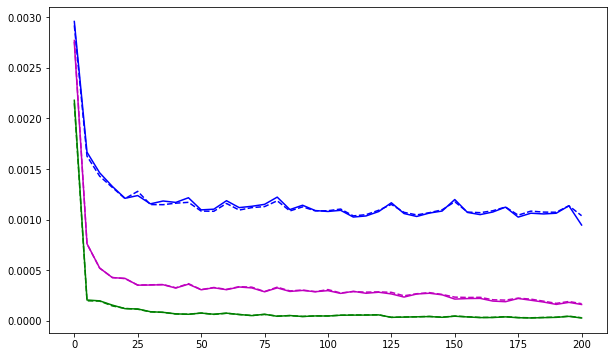

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for name in names:
    c = colors[name]
    ax.plot(epochs, traindata[name], c+'-', label=name)
    ax.plot(epochs, valdata[name], c+'--', label=name)

#ax.set_ylim(0, 0.05)
#ax[1].set_ylim(0, 0.1)

#ax[0].set_title('Training RMSE')
#ax[1].set_title('Validation RMSE')

### Load and check data for varying training set sizes

In [7]:
mos2_sizes = (10, 25, 50, 100, 250, 500, 1000)
c2db_sizes = mos2_sizes + (2500, 4663)
tick_sizes = mos2_sizes + (2500, 5000)

# Make the folder names
mos2_folders = [f'MoS2_15pm-N{n}' for n in mos2_sizes]
mos2_folders[-1] = 'MoS2_15pm'

c2db_folders = [f'c2db_15pm-N{n}' for n in c2db_sizes]
c2db_folders[-1] = 'c2db_15pm'

In [8]:
def get_values(folder):
    f = os.path.join(basefolder, folder, 'histogram-train009.npz')
    data = np.load(f)
    result = dict()
    for k in data.keys():
        result[k] = data[k].mean()
        if k == 'rmse':
            result['mse'] = (data[k]**2).mean()
    f = os.path.join(basefolder, folder, 'histogram-epoch-model-0.npz')
    data = np.load(f)
    for k in data.keys():
        result['val_'+k] = data[k].mean()
        if k == 'rmse':
            result['val_mse'] = (data[k]**2).mean()
    return result

In [9]:
get_values('MoS2_15pm')

{'rmse': 0.005014348212642396,
 'mse': 2.7024438707813984e-05,
 'mae': 0.0026571713093618997,
 'rel_rmse': 0.0648942830290008,
 'rmse_re': 0.003286726688442046,
 'rmse_im': 0.006250456823604484,
 'mae_re': 0.0023172644992425057,
 'mae_im': 0.002997078119481294,
 'scram_rmse': 0.09639025593794424,
 'scram_mae': 0.039990572542472146,
 'scram_rmse_re': 0.027672448504111526,
 'scram_rmse_im': 0.13347740179420453,
 'scram_mae_re': 0.014678640394658313,
 'scram_mae_im': 0.06530250469028599,
 'val_rmse': 0.00517337315860266,
 'val_mse': 2.9206880767449166e-05,
 'val_mae': 0.0027054388472700966,
 'val_rel_rmse': 0.06645175084047483,
 'val_rmse_re': 0.0033447455776508318,
 'val_rmse_im': 0.006469845604546761,
 'val_mae_re': 0.002334210808967451,
 'val_mae_im': 0.003076666885572743,
 'val_scram_rmse': 0.09714584835654114,
 'val_scram_mae': 0.040617244749193857,
 'val_scram_rmse_re': 0.02786810075450375,
 'val_scram_rmse_im': 0.13452779134330695,
 'val_scram_mae_re': 0.014881935312686558,
 'val_s

In [10]:
mos2_data = [get_values(f) for f in mos2_folders]
c2db_data = [get_values(f) for f in c2db_folders]

if use_mse:
    mos2_train = [x['mse'] for x in mos2_data]
    mos2_valid = [x['val_mse'] for x in mos2_data]

    c2db_train = [x['mse'] for x in c2db_data]
    c2db_valid = [x['val_mse'] for x in c2db_data]
else:
    mos2_train = [x['rmse'] for x in mos2_data]
    mos2_valid = [x['val_rmse'] for x in mos2_data]

    c2db_train = [x['rmse'] for x in c2db_data]
    c2db_valid = [x['val_rmse'] for x in c2db_data]


In [30]:
def labelax(ax, lbl, **kwargs):
    ax.text(0.06, 0.98, lbl, fontsize=textsize, 
            verticalalignment='top', horizontalalignment='left',
            transform=ax.transAxes, **kwargs)

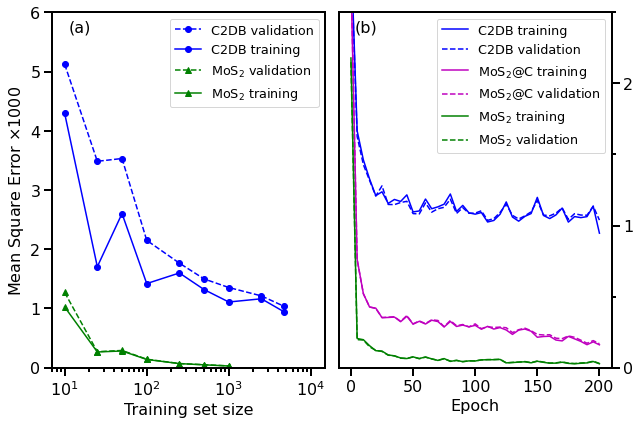

In [36]:
textsize=16

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(9,6))

#fig = plt.figure(figsize=(9,6))
#gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
#ax, ax2 = gs.subplots(sharey=True)

scale = np.array([1000])
ax.plot(c2db_sizes, scale*c2db_valid, 'bo--', label='C2DB validation')
ax.plot(c2db_sizes, scale*c2db_train, 'bo-', label='C2DB training')
ax.plot(mos2_sizes, scale*mos2_valid, 'g^--', label='MoS$_2$ validation')
ax.plot(mos2_sizes, scale*mos2_train, 'g^-', label='MoS$_2$ training')
ax.set_xscale('log')
#ax.set_xticks(tick_sizes)
#ax.set_xticklabels(['{}'.format(n) for n in tick_sizes])
#ax.minorticks_off()
#ax.set_ylim(0, 6e-3)
ax.tick_params('both', length=8, width=2, which='major')
ax.tick_params('both', length=4, width=2, which='minor')

ax.set_xlim(7, 1.5e4)
ax.legend(fontsize=0.8*textsize)
ax.set_xlabel('Training set size', fontsize=textsize)
if use_mse:
    ax.set_ylabel('Mean Square Error $\\times 1000$', fontsize=textsize)
    ax.set_ylim(0, 6)
    ax2.set_ylim(0, 2.5)
    ax2.yaxis.set_major_locator(MultipleLocator(1))
    ax2.yaxis.set_minor_locator(MultipleLocator(5e-1))
else:
    ax.set_ylabel('Root Mean Square Error', fontsize=textsize)
    #ax.set_ylim(0, 6e-3)
ax.tick_params(axis='both', which='major', labelsize=textsize)

ax2.plot(epochs, scale*traindata['c2db_15pm'], 
         label='C2DB training', ls='-', color='b')
ax2.plot(epochs, scale*valdata['c2db_15pm'],
         label='C2DB validation', ls='--', color='b')
ax2.plot(epochs, scale*traindata['MoS2_supported_15pm'],
         label='MoS$_2$@C training', ls='-', color='m')
ax2.plot(epochs, scale*valdata['MoS2_supported_15pm'],
         label='MoS$_2$@C validation', ls='--', color='m')
ax2.plot(epochs, scale*traindata['MoS2_15pm'],
         label='MoS$_2$ training', ls='-', color='g')
ax2.plot(epochs, scale*valdata['MoS2_15pm'],
         label='MoS$_2$ validation', ls='--', color='g')

labelax(ax, '(a)')
labelax(ax2, '(b)')

ax.tick_params('both', length=8, width=2, which='major')
ax.tick_params('both', length=4, width=2, which='minor')
ax2.tick_params('both', length=8, width=2, which='major')
ax2.tick_params('both', length=4, width=2, which='minor')

for i in ax.spines.values():
    i.set_linewidth(2) 
for i in ax2.spines.values():
    i.set_linewidth(2) 

ax2.legend(fontsize=0.8*textsize)
ax2.set_xlabel('Epoch', fontsize=textsize)
ax2.tick_params(axis='both', which='major', labelsize=textsize)
#ax2.tick_params(axis='y', which='both', left=False, right=True)
ax2.yaxis.tick_right()

#plt.subplots_adjust(hspace=0)
plt.tight_layout()

plt.savefig('fig_trainingcurve.png', dpi=300)
None